In [5]:
pip install ucimlrepo

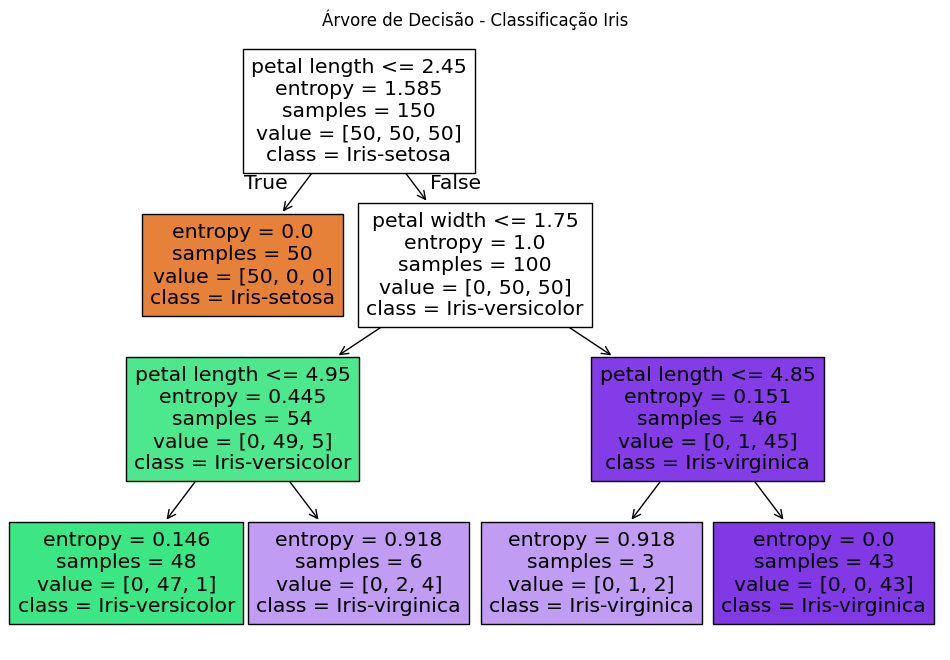

Regras da Árvore de Decisão (com nomes das classes):
|--- petal length <= 2.45
|   |--- class: Iris-setosa
|--- petal length >  2.45
|   |--- petal width <= 1.75
|   |   |--- petal length <= 4.95
|   |   |   |--- class: Iris-versicolor
|   |   |--- petal length >  4.95
|   |   |   |--- class: Iris-virginica
|   |--- petal width >  1.75
|   |   |--- petal length <= 4.85
|   |   |   |--- class: Iris-virginica
|   |   |--- petal length >  4.85
|   |   |   |--- class: Iris-virginica



In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text
import matplotlib.pyplot as plt
from sklearn import tree
from ucimlrepo import fetch_ucirepo

iris = fetch_ucirepo(id=53)

X = iris.data.features
y = iris.data.targets

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y.values.ravel())

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(X, y_encoded)

plt.figure(figsize=(12, 8))
tree.plot_tree(clf,
               feature_names=X.columns,
               class_names=label_encoder.classes_,
               filled=True)
plt.title("Árvore de Decisão - Classificação Iris")
plt.show()

regras = export_text(clf, feature_names=list(X.columns))

regras_decodificadas = regras
for i, classe in enumerate(label_encoder.classes_):
    regras_decodificadas = regras_decodificadas.replace(f'class: {i}', f'class: {classe}')

print("Regras da Árvore de Decisão (com nomes das classes):")
print(regras_decodificadas)
